3.[44 points] Write a program to find the coefficients for a linear regression model for the dataset provided (data2.txt). Assume a linear model: y = w0 + w1*x. You need to

1)	Plot the data (i.e., x-axis for the 1st column, y-axis for the 2nd column), 
and use Python to implement the following methods to find the coefficients: 

2)	Normal equation, and

3)	Gradient Descent using batch AND stochastic modes respectively:

a)	Split dataset into 80% for training and 20% for testing. 

b)	Plot MSE vs. iteration of each mode for both training set and testing set; compare batch and stochastic modes (with discussion) in terms of accuracy (of testing set) and speed of convergence (You need to determine an appropriate termination condition, e.g., when cost function is less than a threshold, and/or after a given number of iterations.) 

c)	Plot MSE of the testing set vs. learning rate (using 0.001, 0.002, 0.003, 0.004, 0.005, 0.006, 0.007, 0.008, 
0.009, 0.01) and determine the best learning rate. 

Please implement the algorithms by yourself and do NOT use the fit() function of the library. 
m

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from numpy.linalg import inv
np.random.seed(42)

%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

In [6]:
data2=pd.read_csv('data2.txt')
data2=data2.sort_values('X').reset_index(drop=True)
X=data2['X'].values
y=data2['Y'].values

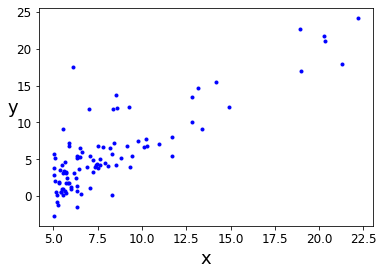

In [12]:
plt.plot(X, y, "b.")
plt.xlabel("x", fontsize=18)
plt.ylabel("y", rotation=0, fontsize=18)
plt.show()

In [34]:
Xshaped = np.c_[np.ones((len(X), 1)), X]  # add x0 = 1 to each instance
theta = np.linalg.inv(Xshaped.T.dot(Xshaped)).dot(Xshaped.T).dot(y)

In [35]:
theta

array([-3.89578088,  1.19303364])

In [57]:
X_new1 = np.array([[5], [25]])
X_new_b = np.c_[np.ones((2, 1)), X_new1]  # add x0 = 1 to each instance
y_predict = X_new_b.dot(theta_best)
y_predict

array([ 2.06938734, 25.93006023])

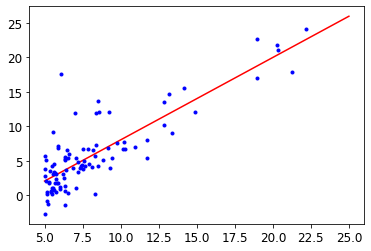

In [58]:
plt.plot(X_new1, y_predict, "r-")
plt.plot(X, y, "b.")
plt.show()

In [59]:
theta2 = []
Xlen = len(Xshaped)


In [81]:
iters=100
l0,l1=1,10

def learning_params(l):
    return l0 / (l + l1)


theta_2 = np.random.randn(2,1)

for iterations in range(iters):
    for i in range(Xlen):
        if iterations == 0 and i < 100:                    
            y_predict = X_new_b.dot(theta_2)           
        random_index = np.random.randint(Xlen)
        xi = Xshaped[random_index:random_index+1]
        yi = y[random_index:random_index+1]
        gradients = 2 * xi.T.dot(xi.dot(theta_2) - yi)
        eta = learning_params(iterations * Xlen + i)
        theta = theta_2 - eta * gradients      

In [82]:
theta

array([[ 1.88296119],
       [-1.49400103]])

In [78]:
from sklearn.linear_model import SGDRegressor
sgd_reg = SGDRegressor(max_iter=50, tol=-np.infty, penalty=None, eta0=0.1, random_state=42)
X_SGD=np.reshape(X, (97, 1))
sgd_reg.fit(Xshaped, y.ravel())

SGDRegressor(eta0=0.1, max_iter=50, penalty=None, random_state=42, tol=-inf)

In [79]:
sgd_reg.intercept_, sgd_reg.coef_

(array([0.81455452]), array([0.81455452, 0.69492299]))

In [80]:
Xshaped.shape

(97, 2)